### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

#### 데이터 불러오기

In [3]:
# sep 구분 기호 활용하여 데이터 불러오기
df = pd.read_csv('./data/customer_personality_analysis.csv', sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print("데이터 전체의 행 수: ",len(df))
print("데이터 컬럼 수: ",len(df.columns))

데이터 전체의 행 수:  2240
데이터 컬럼 수:  29


## 데이터 컬럼 종류

### People (사람)

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level (교육 수준)
- Marital_Status: Customer's marital status (결혼 상태)
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household (어린 아이의 수)
- Teenhome: Number of teenagers in customer's household (10대 수)
- Dt_Customer: Date of customer's enrollment with the company (서비스 가입 날짜)
- Recency: Number of days since customer's last purchase (마지막으로 구매한 날로부터 얼마가 지났는지)
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products (상품)

- MntWines: Amount spent on **wine** in last 2 years
- MntFruits: Amount spent on **fruits** in last 2 years
- MntMeatProducts: Amount spent on **meat** in last 2 years
- MntFishProducts: Amount spent on **fish** in last 2 years
- MntSweetProducts: Amount spent on **sweets** in last 2 years
- MntGoldProds: Amount spent on **gold** in last 2 years

### Promotion (프로모션)

- NumDealsPurchases: Number of purchases made with a discount (할인 받아 구매한 수)
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place (구매 장소)

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

## 데이터 정제하기

- 결측치와 이상치 제거

In [5]:
# 데이터의 전반적인 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# income의 결측치의 값이 크지 않기에
# 24개의 결측치는 제거 한다
df = df.dropna()
print('데이터 전체 행의 개수', len(df))

데이터 전체 행의 개수 2216


In [7]:
# string으로 된 date 를 datetime 함수를 쓰기 위해 datetime 형태 변형

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [8]:
# for문을 활용하여 df["Dt_Customer"]를
# dates라는 빈 리스트에 담는다
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [9]:
# 날짜를 숫자로 변형하여
# 가입 날짜를 지난 일수로 바꿔준다

days = [] 
recent_date = max(dates) # 2014-12-06, 
# 가장 최근 가입일 (해당 날짜를 기준으로 기존 날짜의 값을 빼준다.)
for date in dates:
    day_difference = recent_date - date
    days.append(day_difference)
df["Customer_For"] = days

In [10]:
# 일수로 바꾼 컬럼을 확인한다
df["Customer_For"].head()

0   971 days
1   125 days
2   472 days
3    65 days
4   321 days
Name: Customer_For, dtype: timedelta64[ns]

In [11]:
# 날짜를 숫자로 type 을 변경해준다
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [12]:
# 카테고리형 데이터를 사용 하기 편하게 변환
df[['Education', 'Marital_Status']].head(10)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
5,Master,Together
6,Graduation,Divorced
7,PhD,Married
8,PhD,Together
9,PhD,Together


In [13]:
# Marital_Status 정리하기, 파트너와 같이 사는지, 혼자사는지 여부
df["Living_With"]=(
    df["Marital_Status"]
    .replace(
      {"Married":"Partner", 
       "Together":"Partner", 
       "Absurd":"Alone", 
       "Widow":"Alone", 
       "YOLO":"Alone", 
       "Divorced":"Alone", 
       "Single":"Alone"
    })
)

# the number of children, Kidhome 과 Teenhome 을 분리하지 않고 합쳐준다.
df["Children"]=df["Kidhome"]+df["Teenhome"]

# 위의 데이터를 통해 가족 사이즈도 구할 수 있다.
df["Family_Size"] = (
    df["Living_With"].replace({"Alone": 1, "Partner":2})
    + df["Children"]
)

# 아이가 있는지, 없는지
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [14]:
# 교육 상태 정리하기
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [15]:
# 생년 월일을 통해 나이를 구할 수 있다.
df["Age"] = 2021-df["Year_Birth"]

# 다양한 잡화 구매를 더해서 총 사용한 비용 Spent 를 구한다.
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [16]:
# 컬럼명 짧게 변경
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# 중복되거나 필요없는 컬럼 제거
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [17]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,Alone,0,1,0,64,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,Alone,2,3,1,67,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,Partner,0,2,0,56,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,Partner,1,3,1,37,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,Partner,1,3,1,40,422


In [18]:
# 이상치를 살펴보자
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,Age,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,0.947202,2.592509,0.714350,52.179603,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,0.749062,0.905722,0.451825,11.985554,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,25.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,0.000000,2.000000,0.000000,44.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,1.000000,3.000000,1.000000,51.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,1.000000,3.000000,1.000000,62.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,3.000000,5.000000,1.000000,128.000000,2525.000000


In [19]:
# income 과 age의 이상치를 제거

df = df[(df["Age"]< 90)]
df = df[(df["Income"] < 600000)]
print("Outlier 제거 후 데이터 row 수:", len(df))


# box plot 이나 분포를 보고도 알 수 있음.

Outlier 제거 후 데이터 row 수: 2212


## Correlation Coefficients

- correlation (상관성)이란?
  - 상관성은 두 변수간의 “선형적” 관계의 정도를 의미
  - -1 ~ 1 사이를 가지며 1에 가까울 수록 양의 선형관계, -1에 가까울 수록 음의 선형관계가 강하다는 것을 의미

In [20]:
df.corr()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,Age,Spent
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,...,0.327524,0.104036,-0.027900,0.161387,-0.027892,-0.343529,-0.286638,-0.403132,0.199977,0.792740
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,...,-0.174261,-0.081911,0.037067,-0.077901,-0.057731,0.688081,0.583250,0.520355,-0.237497,-0.557949
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,...,-0.145198,-0.015633,0.007746,-0.154402,0.008986,0.698199,0.594481,0.587993,0.361932,-0.137964
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,...,-0.021147,-0.001429,0.005713,-0.200114,0.030748,0.018062,0.014717,0.002189,0.015694,0.020479
Wines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,...,0.351610,0.206309,-0.036420,0.246320,0.148745,-0.353356,-0.296702,-0.341994,0.164615,0.892996
Fruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,...,0.192417,-0.009924,-0.002956,0.123007,0.059828,-0.395161,-0.341414,-0.410657,0.013447,0.612129
Meat,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,...,0.313379,0.043549,-0.021017,0.237966,0.071381,-0.504176,-0.429948,-0.574147,0.033622,0.845543
Fish,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,...,0.261712,0.002322,-0.019098,0.108135,0.078042,-0.427482,-0.363522,-0.449596,0.041154,0.641884
Sweets,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,...,0.245113,0.010142,-0.020569,0.116059,0.076345,-0.389152,-0.330705,-0.402064,0.021516,0.606652
Gold,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,...,0.170853,0.050976,-0.030166,0.141096,0.145632,-0.267776,-0.235826,-0.245380,0.059779,0.527101


<AxesSubplot:>

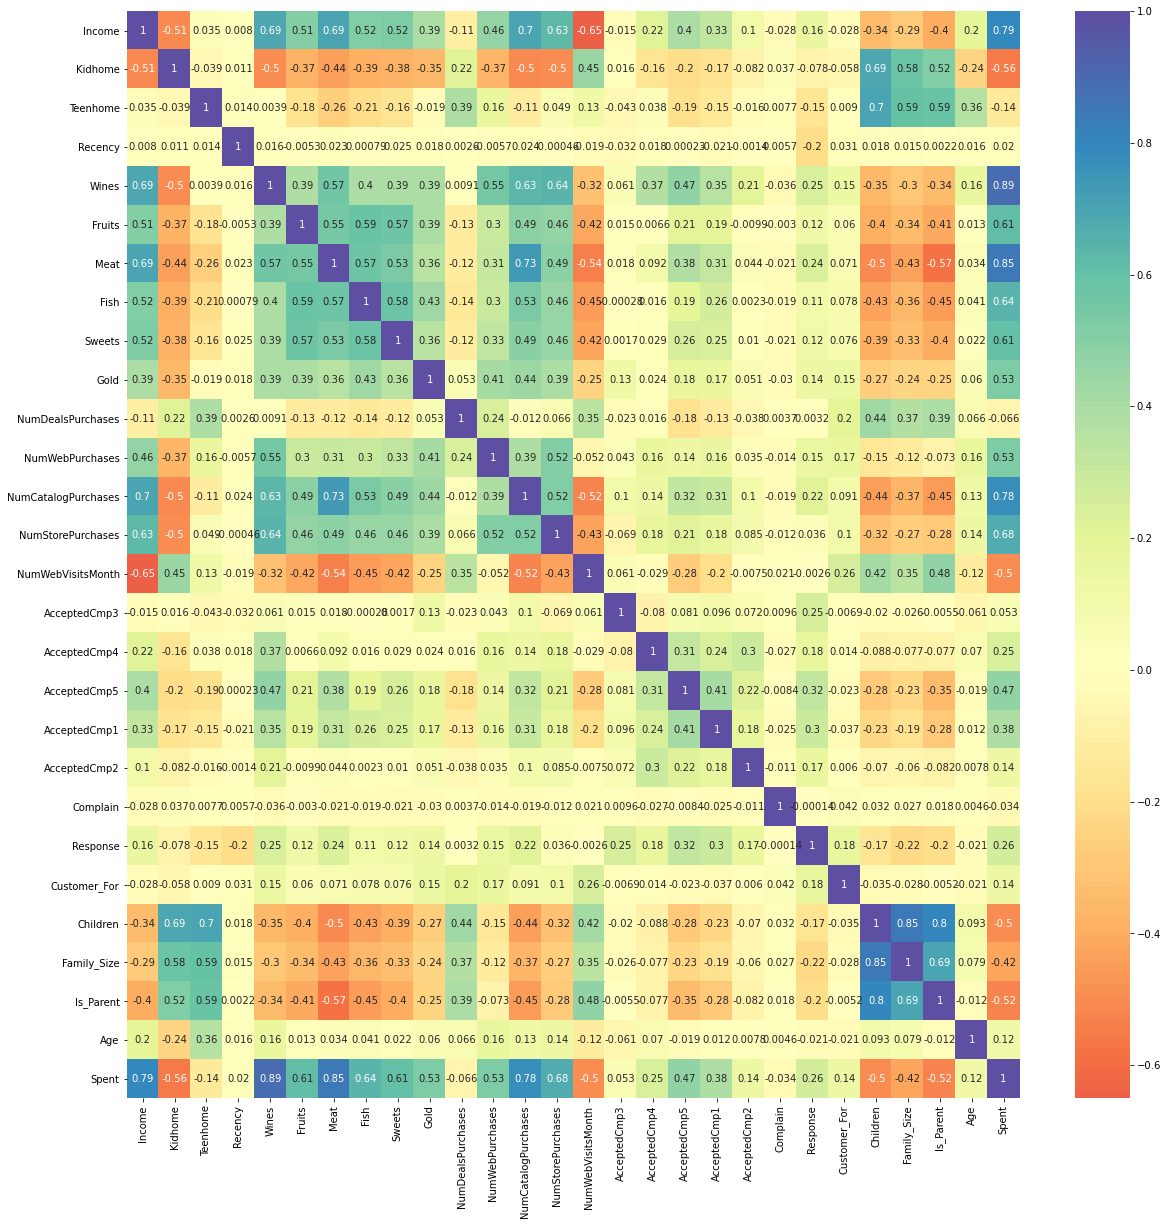

In [21]:
# correlation matrix 히트맵으로 표현하기
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, cmap="Spectral", center=0)

## 데이터 전처리하기

- 카테고리형 데이터 변경
- 피처 scaling 진행
- 차원 축소

In [22]:
# 카테고리 데이터 확인
df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Living_With             object
Children                 int64
Family_Size              int64
Is_Parent                int32
Age                      int64
Spent                    int64
dtype: object

In [25]:
# 카테고리 데이터에 라벨 인코더 사용하기
from sklearn.preprocessing import LabelEncoder

# Education 바꿔주기
LE=LabelEncoder()
df['Education']=df[['Education']].apply(LE.fit_transform)
df['Education'].head()

0    0
1    0
2    0
3    0
4    1
Name: Education, dtype: int64

In [26]:
# Living_With 카테고리 -> 숫자로 바꿔주기
df['Living_With']=df[['Living_With']].apply(LE.fit_transform)
df['Living_With'].head()

0    0
1    0
2    1
3    1
4    1
Name: Living_With, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler

df_1 = df.copy()

# 나중에 클러스터 별 캠페인 반응률을 살펴보기 위해 사용
# 클러스터를 구성하기 위한 피쳐에서는 제거한다.
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_1 = df_1.drop(cols_del, axis=1)


In [29]:
df_1.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,83894400000000000,0,0,1,0,64,1617
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,10800000000000000,0,2,3,1,67,27
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,40780800000000000,1,0,2,0,56,776
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,5616000000000000,1,1,3,1,37,53
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,27734400000000000,1,1,3,1,40,422


In [31]:
#Scaling
scaler = StandardScaler()
scaler.fit(df_1) # mean, variance 계산

# 적용
scaled_df = pd.DataFrame(scaler.transform(df_1), columns= df_1.columns )

In [32]:
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,-1.349603,-1.264598,-1.758359,-1.581139,1.018352,1.676245
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,-1.349603,1.404572,0.449070,0.632456,1.274785,-0.963297
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.740959,-1.264598,-0.654644,-1.581139,0.334530,0.280110
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,0.740959,0.069987,0.449070,0.632456,-1.289547,-0.920135
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,0.740959,0.069987,0.449070,0.632456,-1.033114,-0.307562


## 차원축소

- 상관계수로 봤듯이 서로 관련있는 피처들이 많고
- 변수가 너무 많으면 모델링이 적절하게 되지 않을 수 있음

In [33]:
# PCA 로 3차원으로 데이터를 줄인다.
# sklearn 에서 PCA 모듈을 불러온다.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.982757e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-5.802070e-17,1.706839,-4.312101,-1.328260,-0.158128,1.242269,6.142414
col3,2212.0,8.783410e-19,1.221954,-3.533306,-0.829374,-0.020697,0.799742,6.621481


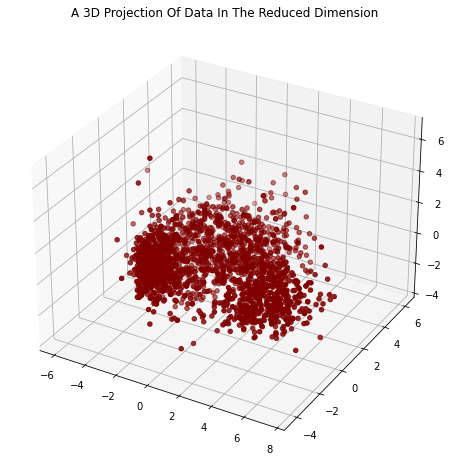

In [35]:
# 차원축소 3d 시각화 만들기
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]

# 그래프 그리기
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## 클러스터링 

- Elbow Method 를통해 최적의 k 값 찾기

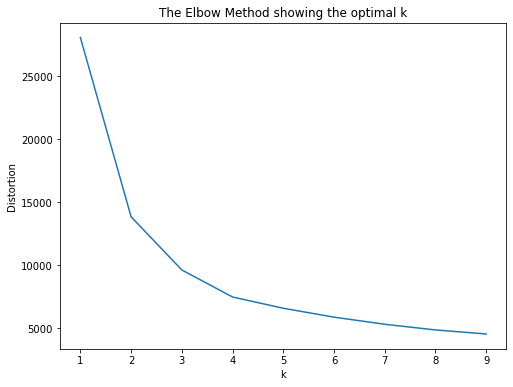

In [38]:
# 모듈 불러오기
from sklearn.cluster import KMeans

# 많은 범위를 설정하면 시간이 오래 걸리므로
# 짧은 범위로만 계산하여 찾는다
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(PCA_df)
    distortions.append(kmeanModel.inertia_)
    
# 시각화 하기
plt.figure(figsize=(8,6))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

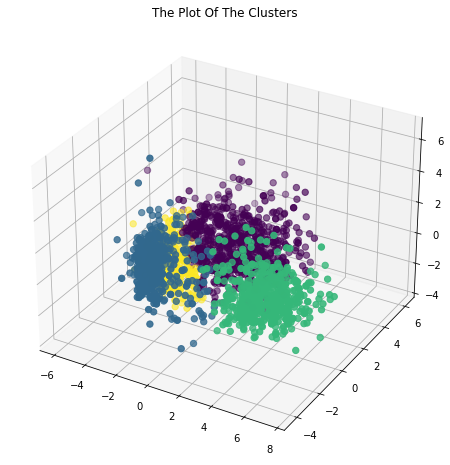

In [40]:
# Hierarchical Clustering 적용

from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC

# 기존 데이터에도 넣는다.
df["Clusters"]= yhat_AC

# 시각화하기
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

## 모델 평가하기

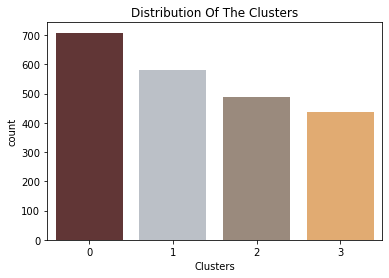

In [41]:
# 클러스터별 카운트
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

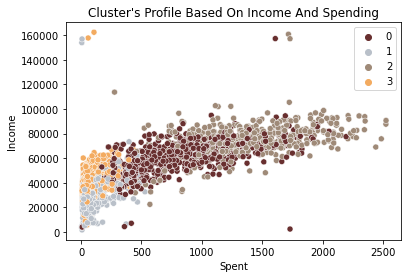

In [42]:
# 클러스터 별 구매금액과 연간 수입 확인
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


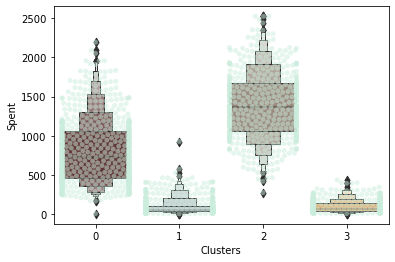

In [44]:
# 구매를 많이 한 고객층 시각화
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)

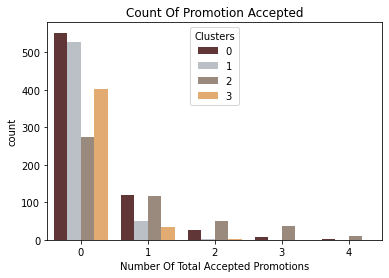

In [45]:
# 전체 프로모션으로 변형
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

# 캠페인 별 반응 확인
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


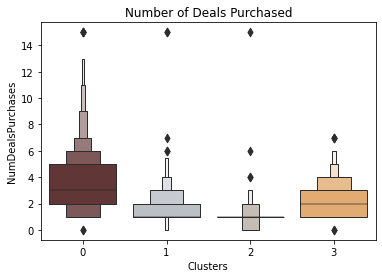

In [46]:
# 할인에 가장 잘 반응한 그룹 시각화
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

## 다양한 클러스터링 모델 사용해보기

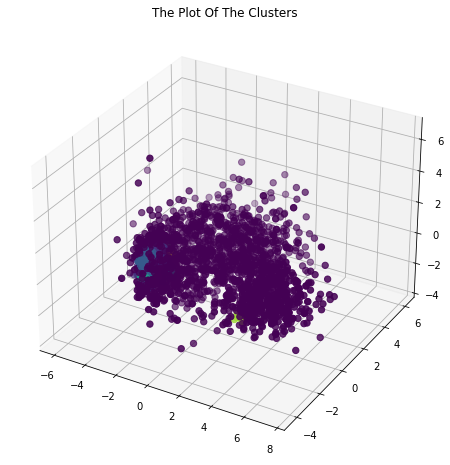

In [49]:
# Density Based Clustering 적용
from sklearn.cluster import DBSCAN

DP = DBSCAN(eps=0.30, min_samples=9)

DP_df = DP.fit_predict(PCA_df)
PCA_df["DBSCAN_Clusters"] = DP_df

# 원본 데이터에도 저장
df["DBSCAN_Clusters"]= DP_df

# 시각화 하기
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["DBSCAN_Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

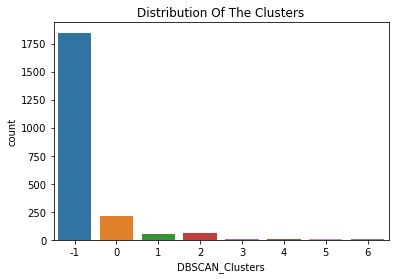

In [50]:
# 클러스터별 카운트
pl = sns.countplot(x=df["DBSCAN_Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

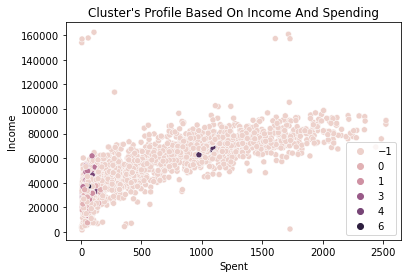

In [51]:
# 클러스터 별 구매금액과 연간 수입 확인
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["DBSCAN_Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points

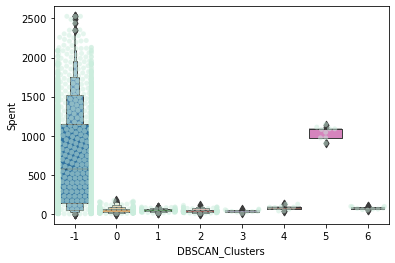

In [52]:
# 구매를 많이 한 고객층 시각화
plt.figure()
pl=sns.swarmplot(x=df["DBSCAN_Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["DBSCAN_Clusters"], y=df["Spent"])
plt.show()

C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points

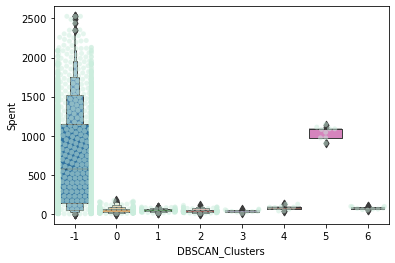

In [53]:
# 할인에 가장 잘 반응한 그룹 시각화
plt.figure()
pl=sns.swarmplot(x=df["DBSCAN_Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["DBSCAN_Clusters"], y=df["Spent"])
plt.show()

In [54]:
# Partition Based Clustering 적용

Kmeans = KMeans(n_clusters=4)
Kmeans_df = Kmeans.fit_predict(PCA_df)
PCA_df["Kmeans_Clusters"] = Kmeans_df
# 원본 데이터에도 저장
df["Kmeans_Clusters"]= Kmeans_df


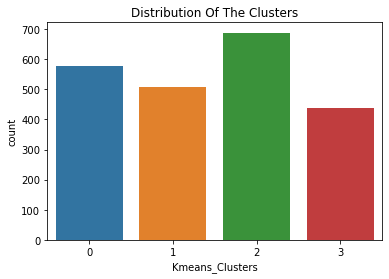

In [55]:
# 클러스터 별 카운트
pl = sns.countplot(x=df["Kmeans_Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

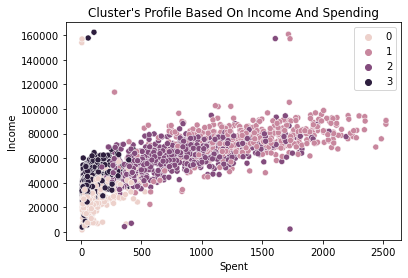

In [56]:
# 클러스터 별 구매금액과 연간 수입 확인
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Kmeans_Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [57]:
# Silhouette Coefficient

from sklearn.metrics import silhouette_samples

# Hierachical
sample_silhouette_values = silhouette_samples(PCA_df, PCA_df["Clusters"])
print("Hierachical",sample_silhouette_values.mean())

# Density - DBSCAN
sample_silhouette_values = silhouette_samples(PCA_df, PCA_df["DBSCAN_Clusters"])
print("Density",sample_silhouette_values.mean())


# Kmeans
sample_silhouette_values = silhouette_samples(PCA_df, PCA_df["Kmeans_Clusters"])
print("Kmeans",sample_silhouette_values.mean())


Hierachical 0.4781872074469919
Density 0.055693832099006545
Kmeans 0.48198169422132137
